# Data visualization
資料視覺化 <br>

Before building a model, observe the data pattern and the distribution of different variables. <br>

製作模型前，先觀察資料的型態以及不同變數的分布 <br>


# import package

In [12]:
# data analysis
import pandas as pd
import numpy as np


# data visual
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from matplotlib.ticker import FuncFormatter, MultipleLocator

# show chinese
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap

plt.style.use("seaborn")
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# import data

In [3]:
# read excel
excel_file = "seven_edit_df.xlsx"
sorted_df = pd.read_excel(excel_file)
# show
sorted_df

,年,月,日,時,分,國道名稱,方向,里程,事件發生,事件排除,...,車輛10,車輛11,車輛12,分局,回堵長度,是否為假日,是否為相近時間,是否為相近地點,相近時間&地點是否有事件,事故車是否包含非小客車
0,2023,1,1,0,31,國道1號,北,286.0,00:31:00,00:39:00,...,NaN,NaN,NaN,3,0,1,0,0,0,0
1,2023,1,1,1,52,國道3號,北,42.0,01:52:00,02:27:00,...,NaN,NaN,NaN,1,0,1,0,0,0,0
2,2023,1,1,4,52,國道3號,北,195.3,04:07:00,04:52:00,...,NaN,NaN,NaN,2,0,1,0,0,0,0
3,2023,1,1,9,2,國道2號,東,16.2,09:02:00,09:36:00,...,NaN,NaN,NaN,1,0,1,0,0,0,0
4,2023,1,1,9,3,國道1號,南,367.4,09:03:00,09:22:00,...,NaN,NaN,NaN,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17737,2023,10,31,18,56,國道4號,東,26.3,18:26:00,18:56:00,...,NaN,NaN,NaN,2,0,0,0,0,0,0
17738,2023,10,31,19,28,國道3號,南,55.8,19:28:00,20:09:00,...,NaN,NaN,NaN,1,0,0,0,0,0,0
17739,2023,10,31,22,13,國道1號,南,96.0,22:13:00,22:25:00,...,NaN,NaN,NaN,1,1,0,0,0,0,0
17740,2023,10,31,22,34,國道3號,北,360.4,22:34:00,23:16:00,...,NaN,NaN,NaN,3,0,0,0,0,0,1


# Make some drawing functions for subsequent use
製作一些繪圖的函數方便後續使用

In [68]:
def plot_box_and_bar(df, column, title, xlabel, xlim = None, bar_color='brown', detect_outliers=False, want_annotata = False):
    total_samples = len(df)
    outliers = []
    
    if detect_outliers:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        total_outliers = len(outliers)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
    
    # Box plot
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].grid(True)
    axes[0].tick_params(axis='both', labelsize=20, width=3, length=10)
    axes[0].set_title(f'Box plot of "{title}"', fontsize=30)
    axes[0].set_xlabel(xlabel, fontsize=20)
    if xlim:
        axes[0].set_xlim(xlim)
    text_content = f'Total samples: {total_samples - total_outliers}' if detect_outliers else f'Total samples: {total_samples}'
    axes[0].text(0.95, 0.95, text_content, transform=axes[0].transAxes, fontsize=20, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # Bar plot
    bar_data = outliers if detect_outliers else df[column]
    bar_plot = axes[1].bar(bar_data.value_counts().index, bar_data.value_counts(), color=bar_color)
    axes[1].set_title(f'Bar plot of "{title}"', fontsize=30)
    axes[1].set_xlabel(xlabel, fontsize=20)
    axes[1].set_ylabel('Count', fontsize=20)
    axes[1].tick_params(axis='both', labelsize=20, width=3, length=10)
    
    text_content = f'Outliers: {total_outliers}' if detect_outliers else f'Total samples: {total_samples}'
    axes[1].text(0.95, 0.95, text_content, transform=axes[1].transAxes, fontsize=20, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))
    
    if want_annotata:
        # Annotate bar heights
        for bar in bar_plot:
            height = bar.get_height()
            axes[1].annotate(f'{height}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=16)

    plt.tight_layout()
    plt.show()


In [ ]:
# def plot_num_bar
def plot_num_bar(df, cols_to_sum, title, xlabel):
    # find out there is a " " in col
    df = df.copy()
    if any('\n註記' in col for col in cols_to_sum):
        df[cols_to_sum] = df[cols_to_sum].replace(" ", np.nan)
    
    # find col
    sum_dict = {col: int(df[col].sum()) for col in cols_to_sum}
    total_sum = sum(sum_dict.values())
    # change into ratio
    percentage_dict = {col.replace("\n註記", ""): (value / total_sum * 100) for col, value in sum_dict.items()}
    
    # bar plot
    plt.figure(figsize=(15, 10))
    bars = plt.bar(percentage_dict.keys(), percentage_dict.values(), color='skyblue')
    plt.title(f'bar plot of {title}', fontsize=30)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel('比例 (%)', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.text(1, 0.95, f'總樣本數: {total_sum}', transform=plt.gca().transAxes, fontsize=16,
             ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # text on bar
    for bar, value in zip(bars, sum_dict.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
                 ha='center', va='bottom', fontsize=16)
    
    # show
    plt.tight_layout()
    plt.show()


In [ ]:
# def plot_cate_bar
def plot_cate_bar(df, cols_to_process, title, xlabel):
    # find col
    total_samples = 0
    type_counts = {}
    for col in cols_to_process:
        unique_values = df[col].value_counts()
        for value, count in unique_values.items():
            if value in type_counts:
                type_counts[value] += count
                total_samples += count
            else:
                type_counts[value] = count
                total_samples += count
    
    # change into ratio
    type_percentage = {key: count / total_samples * 100 for key, count in type_counts.items()}
    
    # bar plot
    plt.figure(figsize=(20, 10))
    bars = plt.bar(type_percentage.keys(), type_percentage.values(), color='skyblue')
    plt.title(title, fontsize=30)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel('出現比例 (%)', fontsize=20)
    plt.xticks(fontsize=20, rotation=45, ha='right')
    plt.yticks(fontsize=20)
    plt.text(0.95, 0.95, f'總樣本數: {total_samples}', transform=plt.gca().transAxes, 
             fontsize=16, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # text on bar
    for bar, count in zip(bars, type_counts.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom', fontsize=16)
    
    # show
    plt.tight_layout()
    plt.show()


# "處理分鐘" box & bar plot

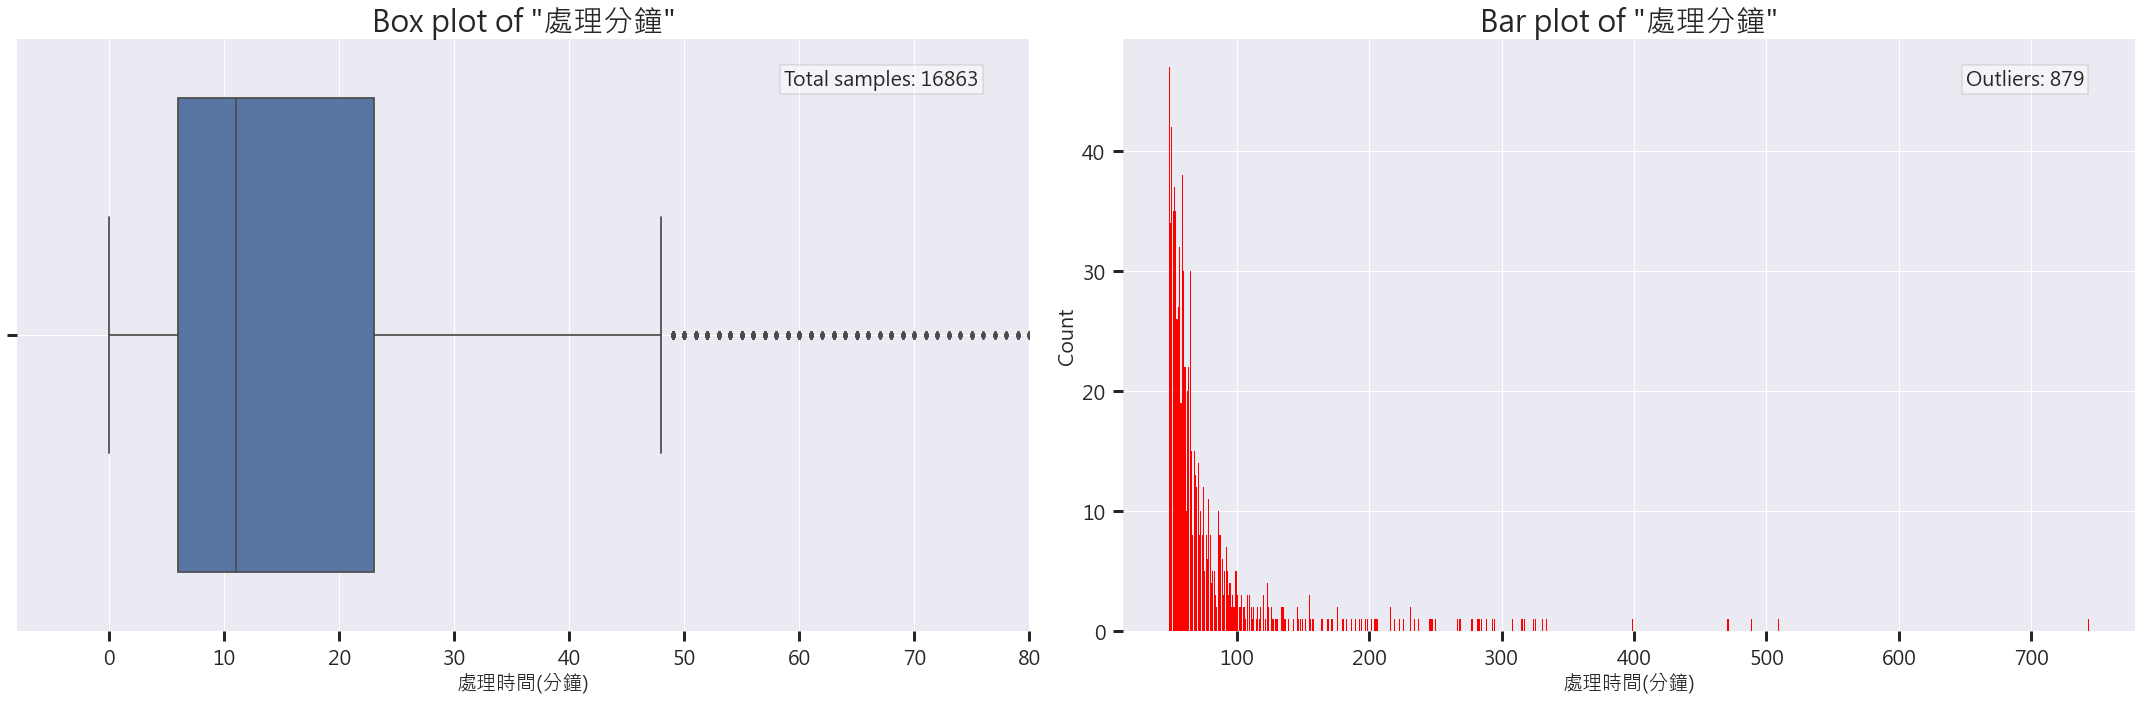

In [72]:
# "處理分鐘" box & bar plot
plot_box_and_bar(sorted_df, '處理分鐘', '處理分鐘', '處理時間(分鐘)', xlim = (-8, 80), bar_color='r', detect_outliers=True)

# "事故類型" pie chart

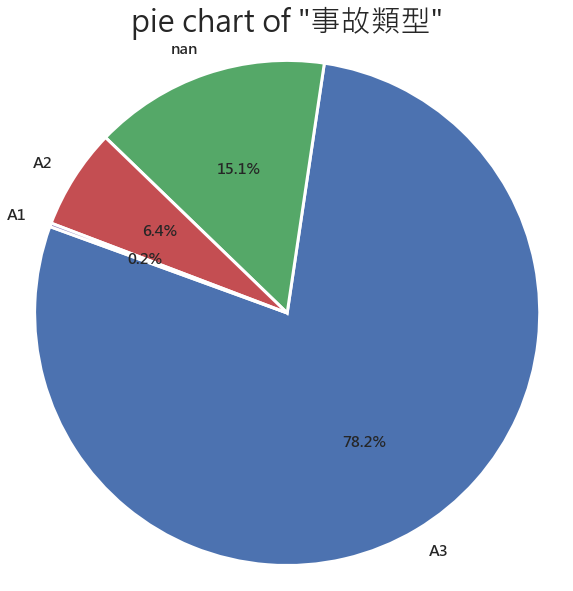

In [9]:
# "事故類型" pie chart
# count
value_counts = sorted_df['事故類型'].value_counts(dropna=False)

# set font
plt.rcParams.update({'font.size': 15})
# pie
plt.figure(figsize=(10, 10))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=160, textprops={
        'weight': 'bold', 'size': 15}, wedgeprops={'linewidth': 3, 'edgecolor': 'w'})
plt.title('pie chart of "事故類型"', fontsize=30)
plt.axis('equal')
# show
plt.show()

# "事故發生車道" bar plot

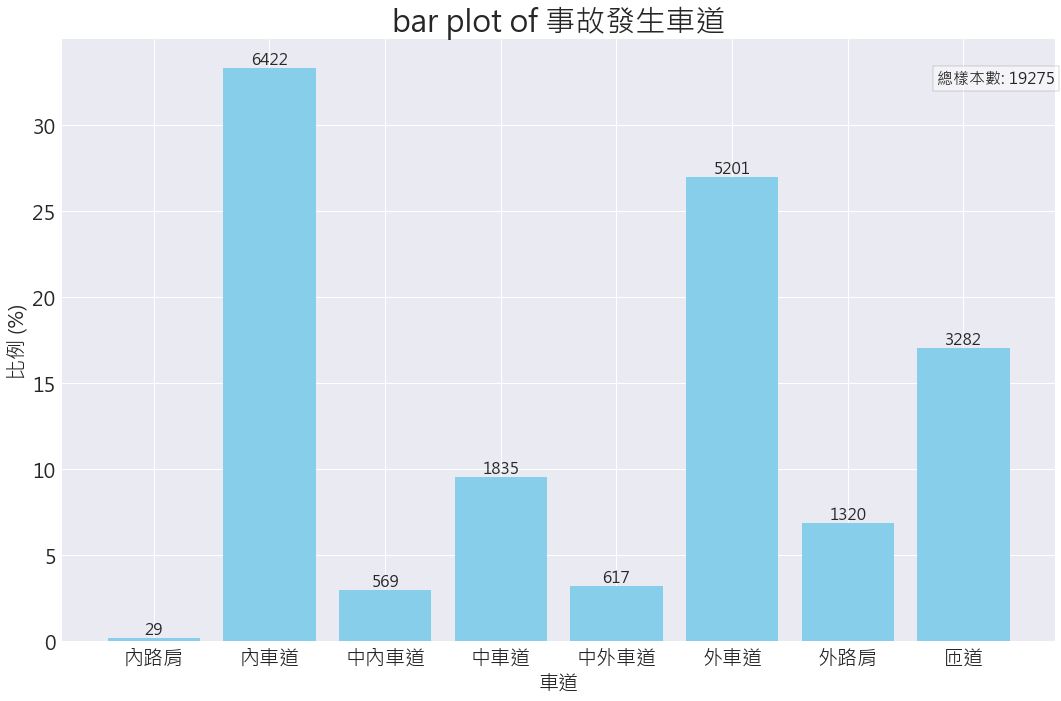

In [27]:
# "事故發生車道" bar plot
accident_lane = ['內路肩', '內車道', '中內車道', '中車道', '中外車道', '外車道', '外路肩', '匝道']
plot_num_bar(sorted_df, accident_lane, '事故發生車道', '車道')

# "事故車詳情" bar plot

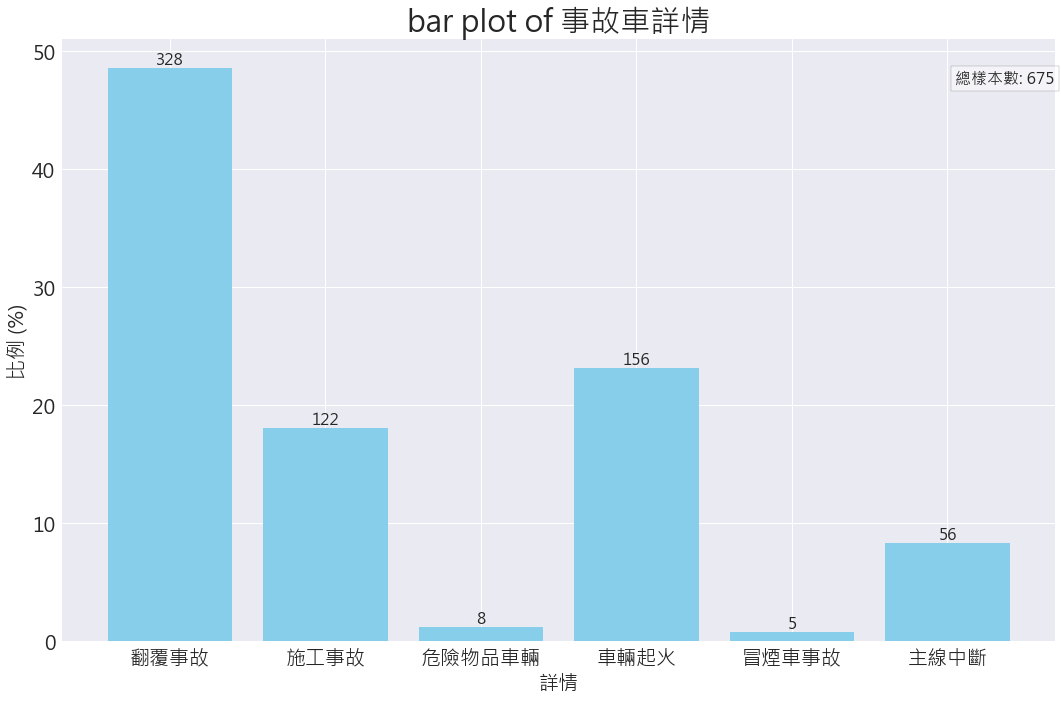

In [28]:
# "事故車詳情" bar plot
accident_details = ['翻覆事故\n註記', '施工事故\n註記', '危險物品車輛\n註記', '車輛起火\n註記', '冒煙車事故\n註記', '主線中斷\n註記']
plot_num_bar(sorted_df, accident_details, '事故車詳情', '詳情')

# "肇事車輛數" box & bar plot

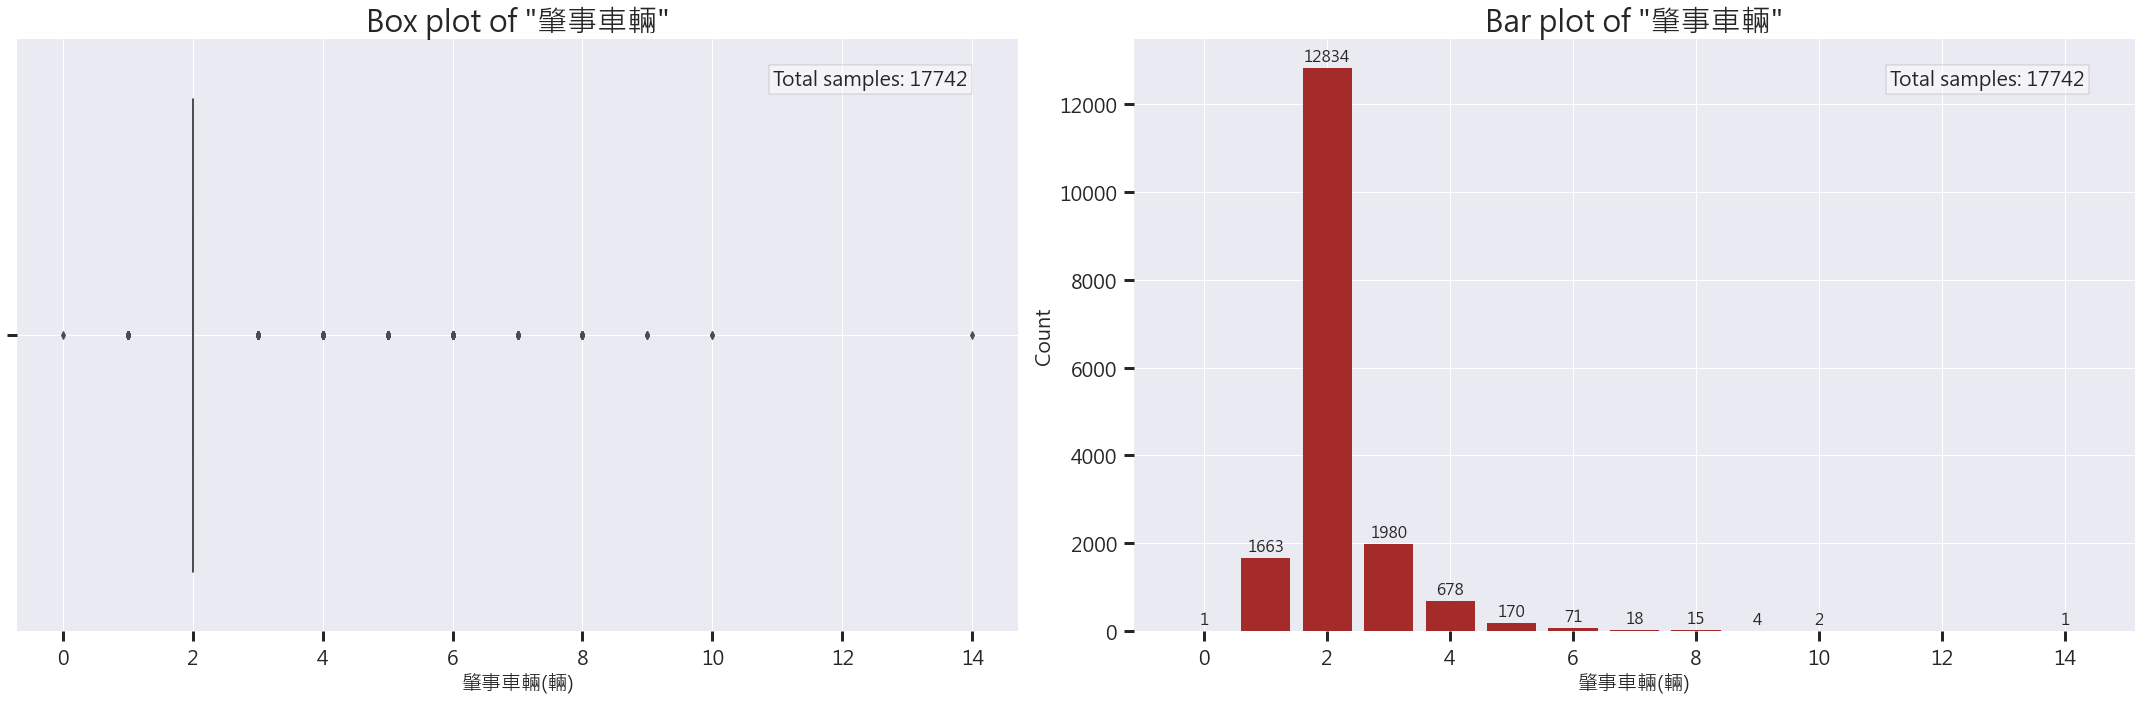

In [71]:
# "肇事車輛" box & bar plot
plot_box_and_bar(sorted_df, '肇事車輛', '肇事車輛', '肇事車輛(輛)', bar_color='brown',want_annotata=True)

# "事故車輛類型" bar plot

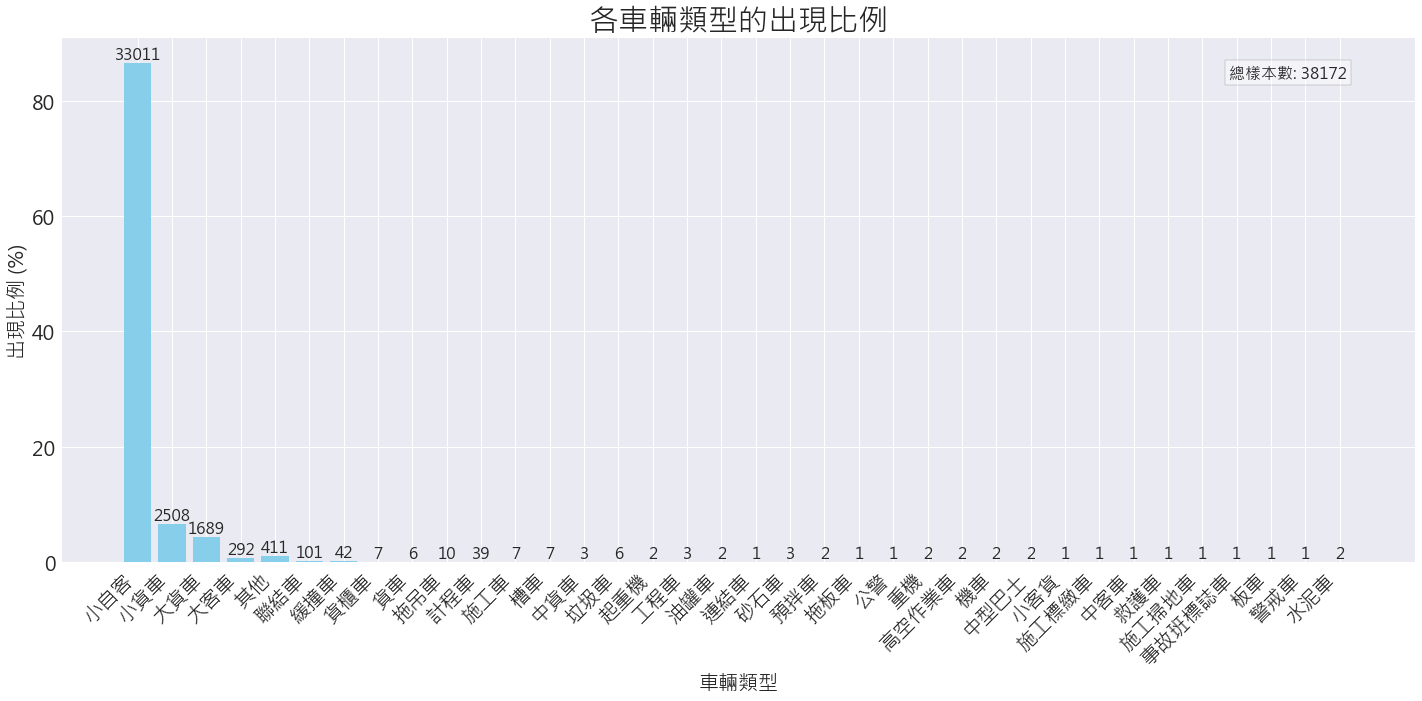

In [47]:
# "事故車輛類型" bar plot
cols_vehicle_types = ['車輛1', '車輛2', '車輛3', '車輛4', '車輛5', '車輛6', '車輛7', '車輛8', '車輛9', '車輛10', '車輛11', '車輛12']
plot_cate_bar(sorted_df, cols_vehicle_types, '各車輛類型的出現比例', '車輛類型')

# "回堵長度" box & bar plot

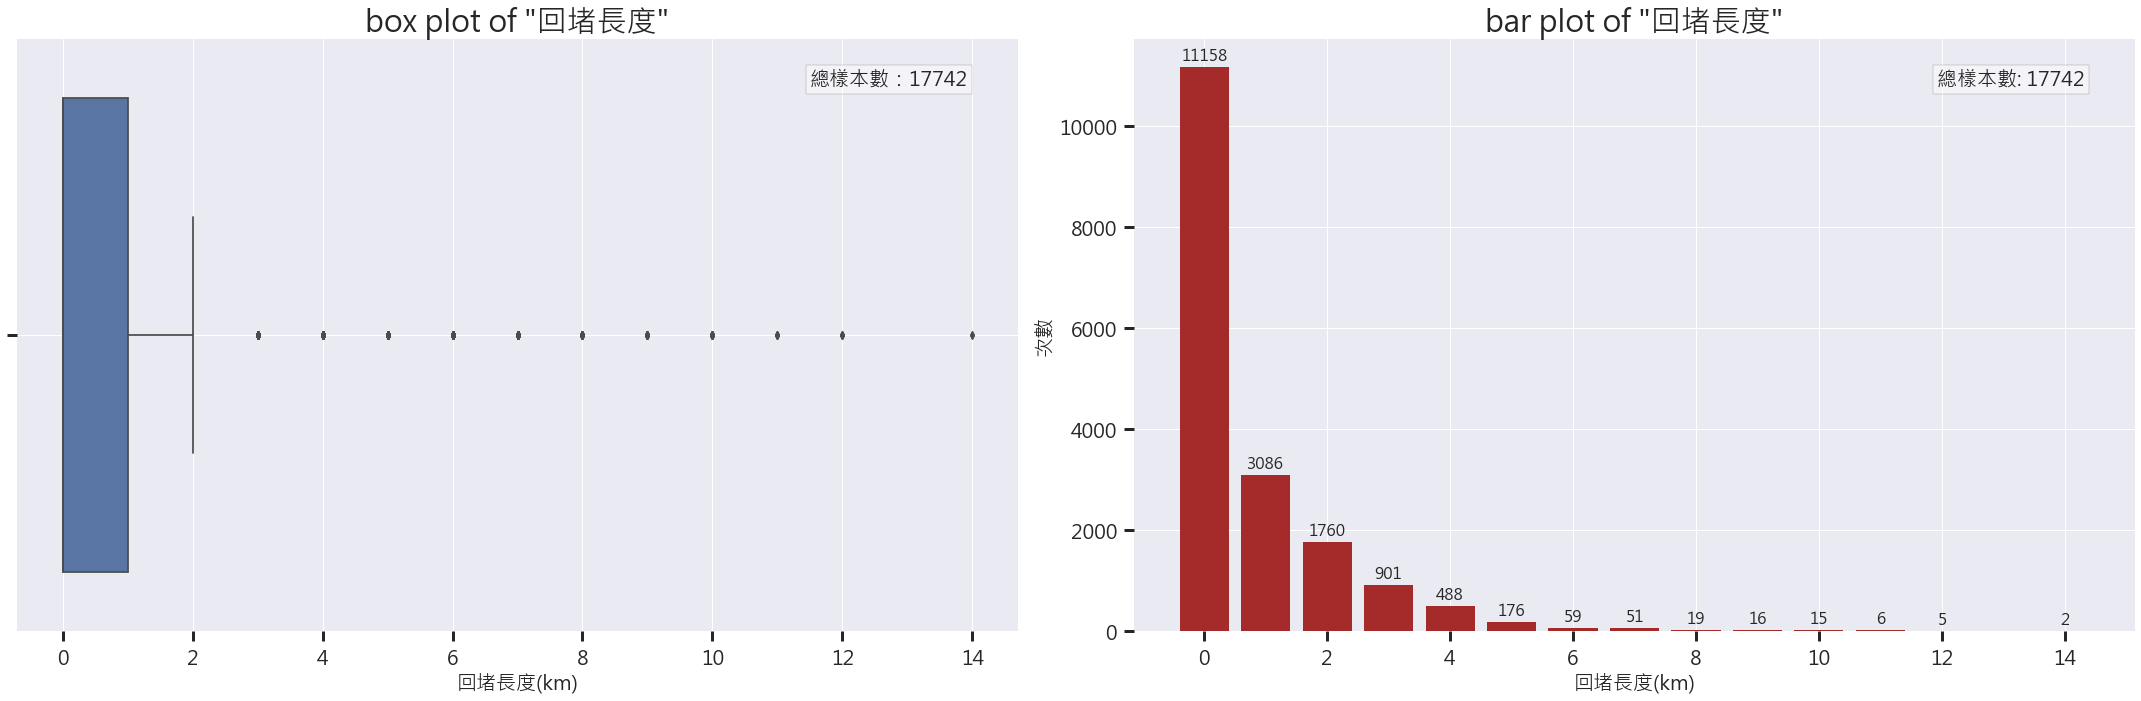

In [ ]:
# "回堵長度" box & bar plot
plot_box_and_bar(sorted_df, '回堵長度', '回堵長度', '回堵長度(km)', bar_color='brown',want_annotata=True)

# "國道名稱" bar plot

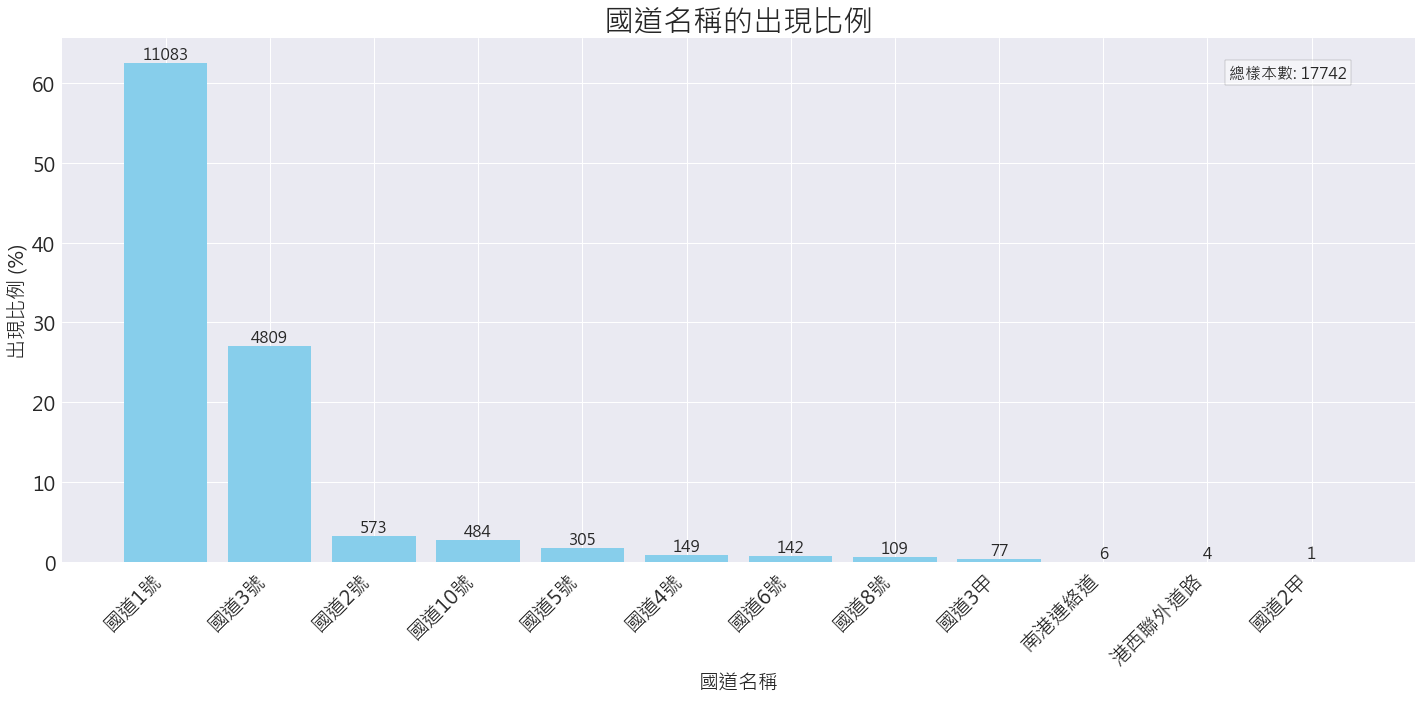

In [51]:
# "國道名稱" bar plot
cols_highway_names = ['國道名稱']
plot_cate_bar(sorted_df, cols_highway_names, '國道名稱的出現比例', '國道名稱')


# "相近時間&地點" box & bar plot

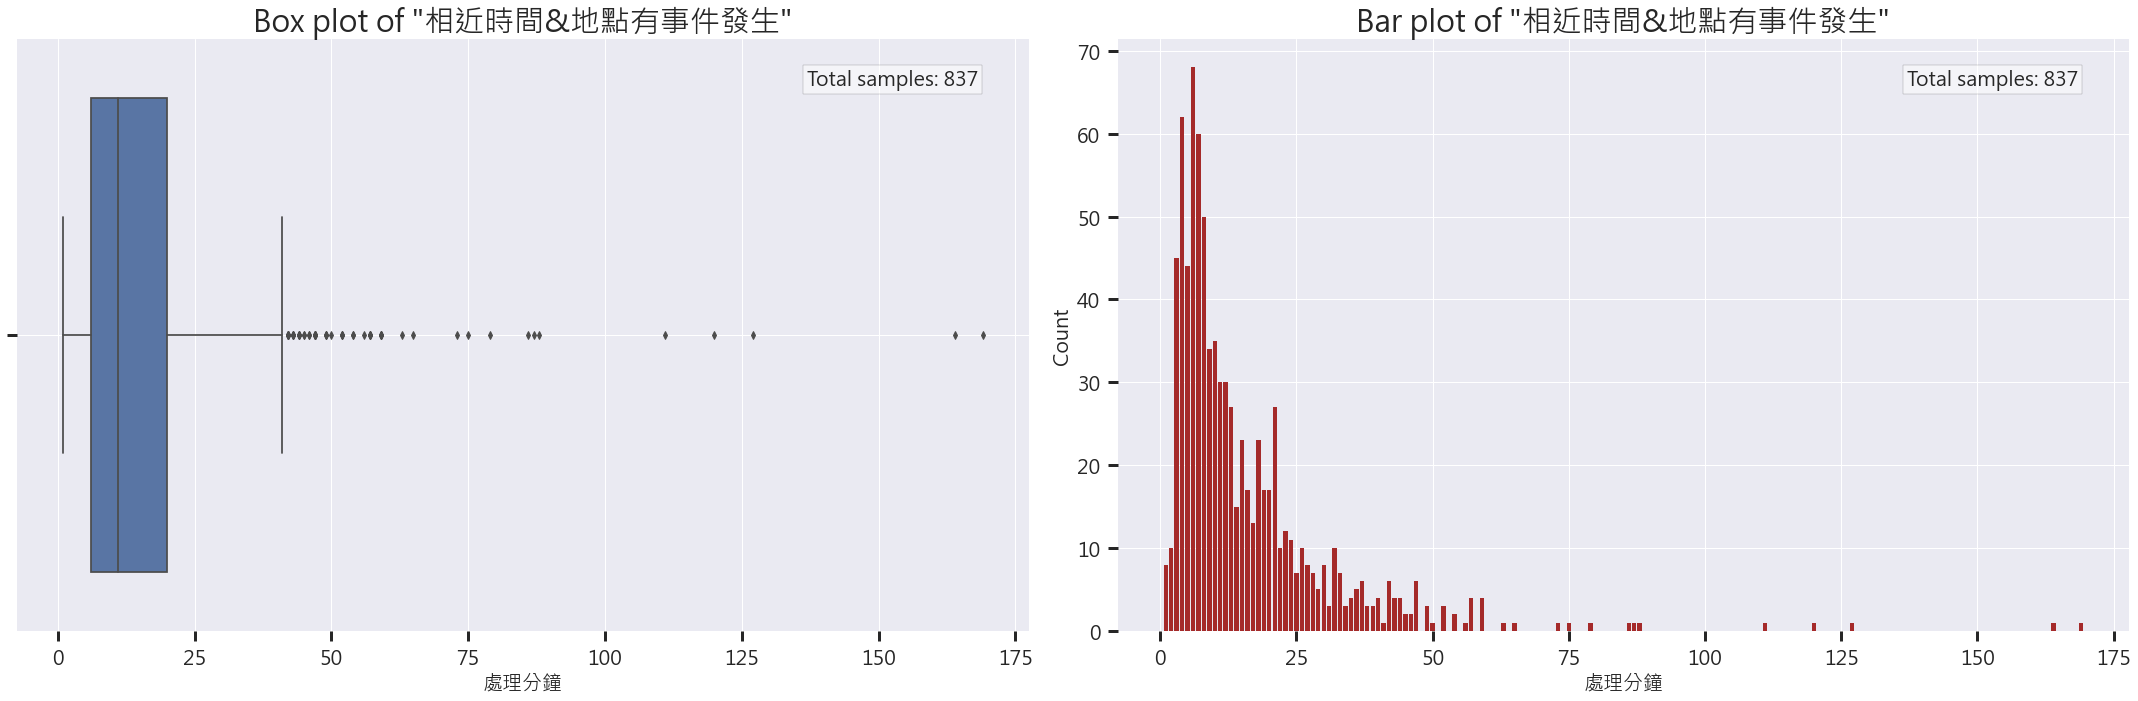

In [ ]:
# "相近時間&地點" box & bar plot
# select data of "相近時間&地點" == 1 
filtered_df = sorted_df[sorted_df['相近時間&地點是否有事件'] == 1]
plot_box_and_bar(filtered_df, '處理分鐘', '相近時間&地點有事件發生', '處理分鐘', bar_color='brown', detect_outliers=False, want_annotata=False)
